In [2]:
from sklearn.preprocessing import PolynomialFeatures #使用多项式方法进行特征构造
from sklearn.linear_model import LinearRegression #线性回归
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))


In [7]:
#创造一些数据给模型拟合
import numpy as np
def make_data(N,err=1.0,rseed=1):
    #随机抽样数据
    rng = np.random.RandomState(rseed)
    X = rng.rand(N,1) ** 2
    y = 10-1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X,y
X,y = make_data(40)

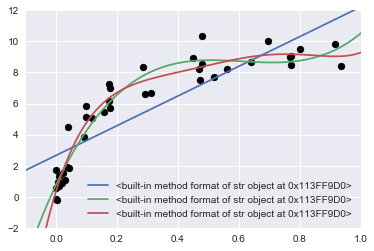

In [9]:
#通过数据可视化，将不同次数的多项式拟合曲线画出来
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;seaborn.set() #设置图样形式

X_test = np.linspace(-0.1,1.1,500)[:,None]

plt.scatter(X.ravel(),y,color='black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialRegression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(),y_test,label='degree={0}'.format)
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')